## Proyecto: Campañas de Marketing directo para depósitos bancarios a plazo fijo

## Descripción del Proyecto y Origen del Dataset

El dataset corresponde a una recopilación de datos relacionados a campañas de marketing, realizados mediante llamadas telefónicas a los clientes.

El objetivo es evaluar la aceptación de un depósito a plazo fijo ofrecido por una entidad bancaria Portuguesa.

Número de registros: 4521

Número de variables: 16, más 1 variable adicional de salida.

Path del Dataset: https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions/

### 1. Descripción del dataset:

In [34]:
# Importar las librerias a utilizar.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Lectura del dataset en un dataframe.
df = pd.read_csv('test.csv', sep=',')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [36]:
df.shape

(4521, 17)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### 1.1. Hallazgos:

4521 registros, 17 variables.

No existe la presencia de valores nulos.

- 01 - age: edad (numérico)
- 02 - job: tipo de empleo (categórico: "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services").
- 03 - marital: estado civil (categórico: "married", "divorced", "single").
- 04 - education: nivel educativo (categórico: "unknown", "secondary", "primary", "tertiary").
- 05 - default: indicador si existe algún crédito en rojo (binario: "yes", "no").
- 06 - balance: balance de la cuenta del cliente en euros (numérico).
- 07 - housing: indicador de préstamo hipotecario (binario: "yes", "no").
- 08 - loan: si existe o no algún crédito personal (binario: "yes", "no").

Variables relacionadas con el último contacto de la campaña actual:
- 09 - contact: tipo de comunicación (categórico: "unknown", "telephone", "cellular").
- 10 - day: día de la última comunicacón (numérico)
- 11 - month: mes de la última comunicación (categórico: "jan", "feb", "mar", ..., "nov", "dec")
- 12 - duration: duración en segundos de la última comunicación (numérico).

Otros atributos:
- 13 - campaign: número de comunicaciones realizadas durante la campaña actual por cada cliente (numérico).
- 14 - pdays: número de días desde que se contactó con el cliente desde una campaña anterior. El valor -1 significa que el cliente no fue contactado previamente (numérico).
- 15 - previous: número de comunicaciones realizadas antes de la campaña actual (numérico).
- 16 - poutcome: resultado de la campaña de marketing anterior (categórico: "unknown", "other", "failure", "success").

Variable de salida:
- 17 - y: indica si el cliente ha contratado un depósito a plazo fijo (binario: "yes", "no").

### 2. Creación de la base datos en SQLite

In [38]:
# Librerias a importar.
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.orm import sessionmaker, declarative_base

# Crear la base de datos SQLite y establecer la conexión.
engine = create_engine('sqlite:///bank_marketing.db', echo=True)

# Crear la sesión.
Session = sessionmaker(bind=engine)
session = Session()

# Definir modelo de datos - Schema
Base = declarative_base()

# Definir la tabla
class BankCampaign(Base):
    __tablename__ = 'bank_campaigns'

    id = Column(Integer, primary_key=True)
    age = Column(Integer)
    job = Column(String)
    marital = Column(String)
    education = Column(String)
    default = Column(String)
    balance = Column(Integer)
    housing = Column(String)
    loan = Column(String)
    contact = Column(String)
    day = Column(Integer)
    month = Column(String)
    duration = Column(Integer)
    campaign = Column(Integer)
    pdays = Column(Integer)
    previous = Column(Integer)
    poutcome = Column(String)
    y = Column(String)

    def __repr__(self):
        return (
            f"<BankCampaign(age={self.age}, job='{self.job}', marital='{self.marital}', "
            f"education='{self.education}', default='{self.default}', balance={self.balance}, "
            f"housing='{self.housing}', loan='{self.loan}', contact='{self.contact}', day={self.day}, "
            f"month='{self.month}', duration={self.duration}, campaign={self.campaign}, "
            f"pdays={self.pdays}, previous={self.previous}, poutcome='{self.poutcome}', "
            f"y='{self.y}')>"
        )

# Crear la tabla BankCampaign
Base.metadata.create_all(engine)

2024-07-23 20:35:51,300 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-23 20:35:51,301 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("bank_campaigns")
2024-07-23 20:35:51,302 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-23 20:35:51,304 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("bank_campaigns")
2024-07-23 20:35:51,304 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-07-23 20:35:51,306 INFO sqlalchemy.engine.Engine 
CREATE TABLE bank_campaigns (
	id INTEGER NOT NULL, 
	age INTEGER, 
	job VARCHAR, 
	marital VARCHAR, 
	education VARCHAR, 
	"default" VARCHAR, 
	balance INTEGER, 
	housing VARCHAR, 
	loan VARCHAR, 
	contact VARCHAR, 
	day INTEGER, 
	month VARCHAR, 
	duration INTEGER, 
	campaign INTEGER, 
	pdays INTEGER, 
	previous INTEGER, 
	poutcome VARCHAR, 
	y VARCHAR, 
	PRIMARY KEY (id)
)


2024-07-23 20:35:51,307 INFO sqlalchemy.engine.Engine [no key 0.00081s] ()
2024-07-23 20:35:51,309 INFO sqlalchemy.engine.Engine COMMIT


### 2.1. Insertar los datos del dataset en la tabla BankCampaign (batch insert)

In [39]:
# Convertir el dataFrame a una lista de diccionarios.
data_dict = df.to_dict(orient='records')

# Insertar datos en la tabla BankCampaign
session.bulk_insert_mappings(BankCampaign, data_dict)
session.commit()

# Mostrar los 10 primeros registros de la tabla BankCampaign
queryset = session.query(BankCampaign).limit(10).all()
for _instance in queryset:
    print(_instance)


2024-07-23 20:35:51,372 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-07-23 20:35:51,451 INFO sqlalchemy.engine.Engine INSERT INTO bank_campaigns (age, job, marital, education, "default", balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2024-07-23 20:35:51,452 INFO sqlalchemy.engine.Engine [generated in 0.03826s] [(30, 'unemployed', 'married', 'primary', 'no', 1787, 'no', 'no', 'cellular', 19, 'oct', 79, 1, -1, 0, 'unknown', 'no'), (33, 'services', 'married', 'secondary', 'no', 4789, 'yes', 'yes', 'cellular', 11, 'may', 220, 1, 339, 4, 'failure', 'no'), (35, 'management', 'single', 'tertiary', 'no', 1350, 'yes', 'no', 'cellular', 16, 'apr', 185, 1, 330, 1, 'failure', 'no'), (30, 'management', 'married', 'tertiary', 'no', 1476, 'yes', 'yes', 'unknown', 3, 'jun', 199, 4, -1, 0, 'unknown', 'no'), (59, 'blue-collar', 'married', 'secondary', 'no', 0, 'yes', 'no', 'unknown', 5, 'may

### 2.2. Crear el dataframe a partir del queryset de BankCampaign

In [40]:
queryset = session.query(BankCampaign).all()
def to_dict(obj):
    """Convertir el queryset a diccionario. Excluir la columna id."""
    return {c.name: getattr(obj, c.name) for c in obj.__table__.columns if c.name != 'id'}

# Convertir el queryset a una lista de diccionarios.
results_dict = [to_dict(instance) for instance in queryset]

# Crear el DataFrame.
df = pd.DataFrame(results_dict)
df

2024-07-23 20:35:51,509 INFO sqlalchemy.engine.Engine SELECT bank_campaigns.id AS bank_campaigns_id, bank_campaigns.age AS bank_campaigns_age, bank_campaigns.job AS bank_campaigns_job, bank_campaigns.marital AS bank_campaigns_marital, bank_campaigns.education AS bank_campaigns_education, bank_campaigns."default" AS bank_campaigns_default, bank_campaigns.balance AS bank_campaigns_balance, bank_campaigns.housing AS bank_campaigns_housing, bank_campaigns.loan AS bank_campaigns_loan, bank_campaigns.contact AS bank_campaigns_contact, bank_campaigns.day AS bank_campaigns_day, bank_campaigns.month AS bank_campaigns_month, bank_campaigns.duration AS bank_campaigns_duration, bank_campaigns.campaign AS bank_campaigns_campaign, bank_campaigns.pdays AS bank_campaigns_pdays, bank_campaigns.previous AS bank_campaigns_previous, bank_campaigns.poutcome AS bank_campaigns_poutcome, bank_campaigns.y AS bank_campaigns_y 
FROM bank_campaigns
2024-07-23 20:35:51,511 INFO sqlalchemy.engine.Engine [generated 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### 3. EDA - Análisis Exploratorio de Datos

In [41]:
# Estadísticas de las columnas numéricas del conjunto de datos,
# por ejemplo, media, valor nínimo/máximo, percentiles, entre otros.
df_backup = df.copy()
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [42]:
# Validar si existen columnas duplicadas.
# Output: No existen columnas duplicadas.
df.duplicated().sum()

np.int64(0)

### 3.1. Análisis de variables

#### 3.1.1. Análisis de variable "age" (Edad)

<Axes: ylabel='Frequency'>

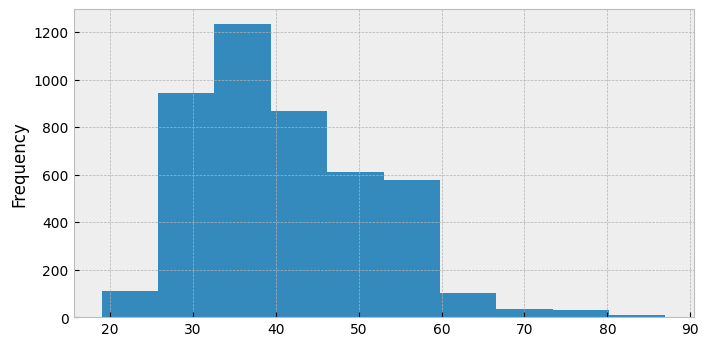

In [43]:
plt.rcParams['figure.figsize'] = (8,4)  # Tamaño de la imagen
plt.style.use('bmh')  # Opciones de estilo

# El histograma indica que la mayoría de las personas del conjunto de datos tienen entre 30 y 40 años.
# También hay un grupo importante de personas entre 40 y 60 años.
df['age'].plot.hist()

#### 3.1.2. Análisis de variable "balance" (Balance el la cuenta cliente)

<Axes: ylabel='Frequency'>

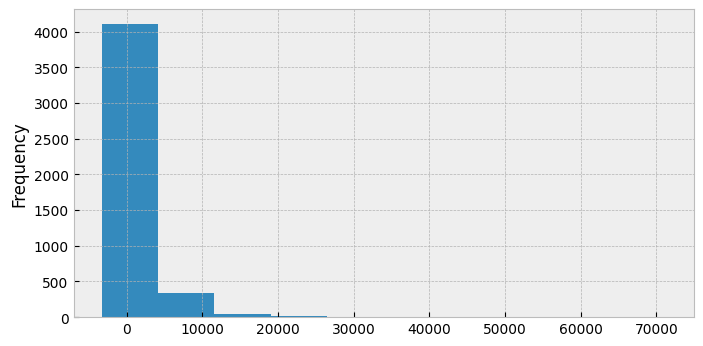

In [44]:
# Se visualiza que 4421 clientes tienen un balance medio de 1422 euros.
df['balance'].plot.hist()

#### 3.1.3. Análisis de variable "day" (Día de la última comunicación)

<Axes: ylabel='Frequency'>

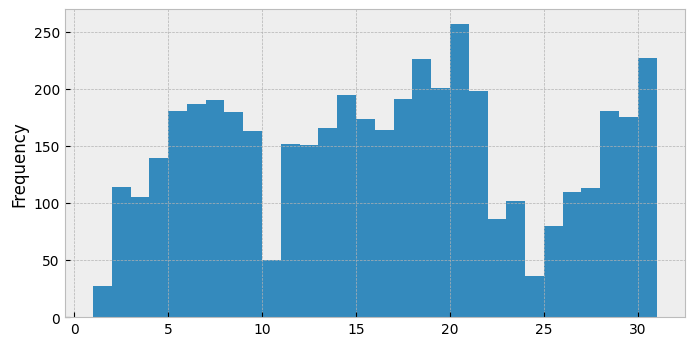

In [45]:
# Se deduce que los días en los que más se intensifica la campaña de marketing son los comprendidos entre el dia 5-10,
# el dia 13-22 y, el dia 27-30 de cada mes, mientras que los días en los que menos se comunica con los clientes potenciales
# son los comprendidos entre el día 1-4, el día 10-13 y el día 22-27 de cada mes.
df['day'].plot.hist(bins=30)

#### 3.1.4. Análisis de variable "duración" (Duración en segundos de la última comunicación)

In [46]:
duration_stats = df['duration'].describe()

def convert_seconds_to_hms(seconds):
    """Convertir segundos a formato h:m:s"""
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return f"{int(hours)}:{int(minutes)}:{int(seconds)}"

# Convertir las estadísticas de duración a formato h:m:s
duration_stats_hms = duration_stats.apply(convert_seconds_to_hms)
print('Estadísticas descriptivas de duración en segundos')
print(duration_stats)
print('Estadísticas descriptivas de duración en formato h:m:s')
print(duration_stats_hms)

Estadísticas descriptivas de duración en segundos
count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64
Estadísticas descriptivas de duración en formato h:m:s
count    1:15:21
mean      0:4:23
std       0:4:19
min        0:0:4
25%       0:1:44
50%        0:3:5
75%       0:5:29
max      0:50:25
Name: duration, dtype: object


<Axes: >

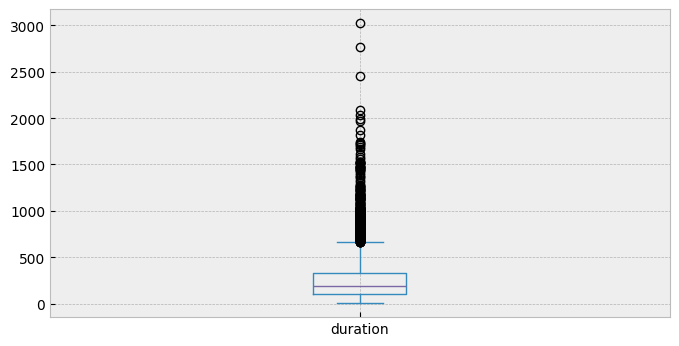

In [47]:
# El diagrama de caja muestra que la duración media de las comunicaciones telefónicas es de 4m 23s(263s).
# El percentil del 25% es de 1m 44s(104s).
# El percentil del 75% es de 5m 29 segundos(329s).
# Los valores atípicos se sitúan por encima de 5m 29s(329s), alcanzando un máximo de 50m 25s(3025s)
df['duration'].plot.box()

#### 3.1.5. Análisis de variable "campaign" (campaña: Número de comunicaciones realizadas durante la campaña actual por cada cliente)

In [48]:
df['campaign'].describe()

count    4521.000000
mean        2.793630
std         3.109807
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        50.000000
Name: campaign, dtype: float64

<Axes: >

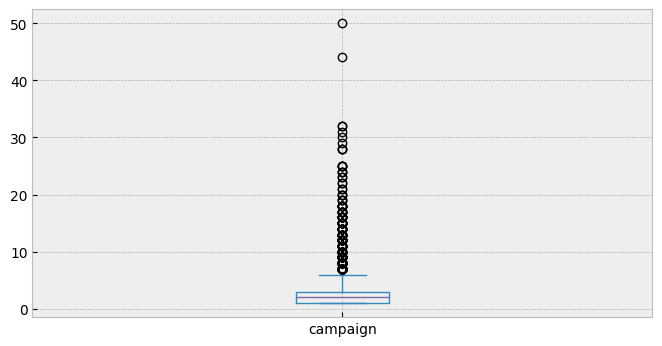

In [49]:
# El diagrama de caja muestra que el número medio de comunicaciones realizadas en la campaña actual se sitúa en torno a 2,79.
# El percentil del 25% se sitúa en torno a 1 comunicación.
# El percentil 75% se sitúa en torno a 3 comunicaciones.
# Los valores atípicos se sitúan por encima de 3 comunicaciones, alcanzando un máximo de 50 comunicaciones.
df['campaign'].plot.box()

#### 3.1.6. Análisis de variable "pdays" (Número de días desde que se contactó con el cliente desde una campaña anterior)

In [50]:
df['pdays'].describe()

count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

ModuleNotFoundError: No module named 'scipy'

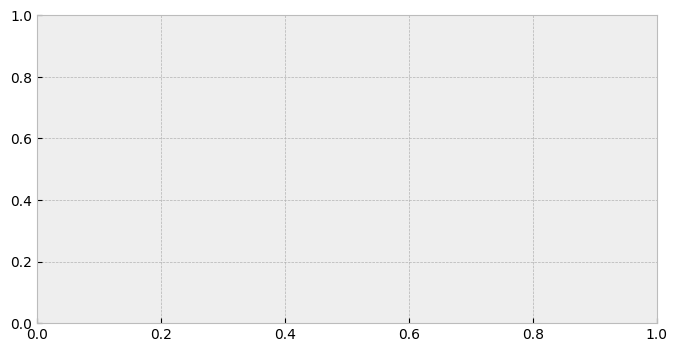

In [51]:
# En el gràfico de densidad, se describe el mayor porcentaje de clientes
# que no fueron contactados desde una camapaña anterior.
# En referencia a los clientes contactados, han pasado una media de 39 días
# desde la última vez que se contacto a un cliente para una campaña anterior.
df['pdays'].plot.density()

#### 3.1.7. Análisis de variable "previous" (Número de comunicaciones realizadas antes de la campaña actual)

<Axes: ylabel='Frequency'>

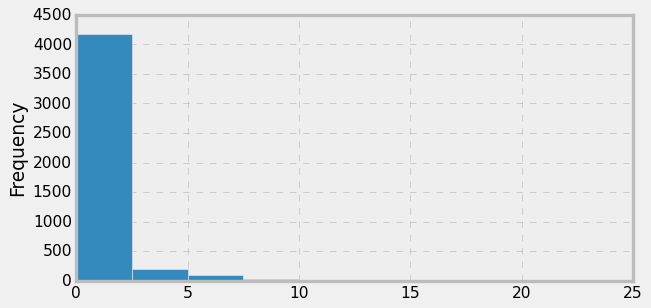

In [ ]:
# El histograma muestra que la gran mayoría de llamadas anteriores realizadas a los
# usuarios se mantiene en el rango de 1 llamada.
df['previous'].plot.hist()

#### 3.1.8. Análisis de variable "job" (Tipo de empleo)

<Axes: xlabel='job'>

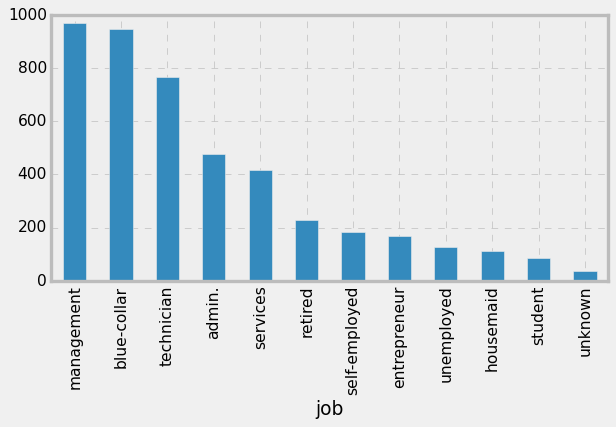

In [ ]:
df['job'].value_counts().plot.bar()

In [ ]:
# Se aprecia las categorías laborales.
# El mayor grupo contactado son 'management', 'blue-collar' y 'technician'.
df['job'].value_counts(normalize=True)

job
management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: proportion, dtype: float64

#### 3.1.9. Análisis de variable "marital" (Estado Civil)

<Axes: ylabel='count'>

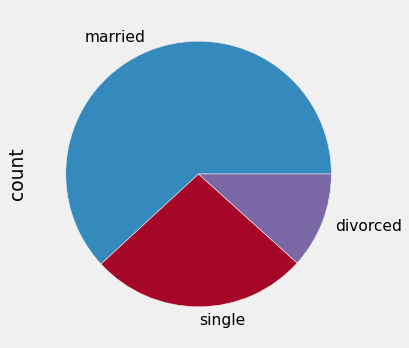

In [ ]:
df['marital'].value_counts().plot.pie(figsize=(5,5))

In [ ]:
# A partir del gráfico circular, se observa que el mayor porcentaje de clientes son personas casadas que representan un 61%,
# seguido de un 26% de personas solteras y divorciadas alrededor de 11%
df['marital'].value_counts(normalize=True)

marital
married     0.618668
single      0.264543
divorced    0.116788
Name: proportion, dtype: float64

#### 3.1.10. Análisis de variable "education" (Nivel educativo)

<Axes: xlabel='education'>

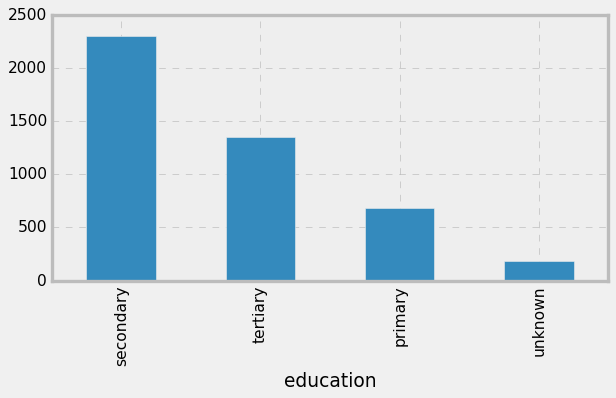

In [ ]:
df['education'].value_counts().plot.bar()

In [ ]:
# El gràfico de barra muestra que la mayoría de clientes son de educación secundaria.
# Existe un 4% del cual se desconoce su nivel educativo.
df['education'].value_counts(normalize=True)

education
secondary    0.510064
tertiary     0.298607
primary      0.149967
unknown      0.041363
Name: proportion, dtype: float64

#### 3.1.11. Análisis de variable "default" (Indicador si existe algún crédito en rojo)

<Axes: xlabel='default'>

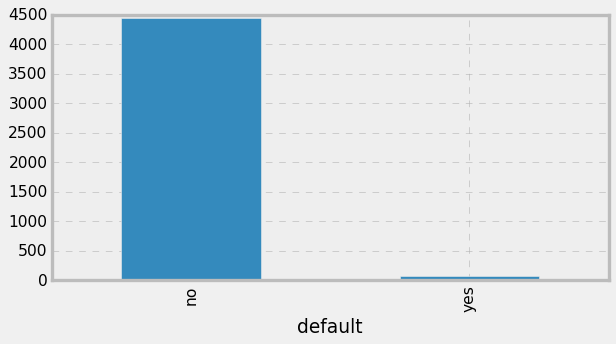

In [ ]:
df['default'].value_counts().plot.bar()

In [ ]:
# La vasta mayoría de clientes, un 98%, no tienen crédito en rojo.
df['default'].value_counts(normalize=True)

default
no     0.98319
yes    0.01681
Name: proportion, dtype: float64

#### 3.1.12. Análisis de variable "housing" (Indicador de préstamo hipotecario)

<Axes: ylabel='count'>

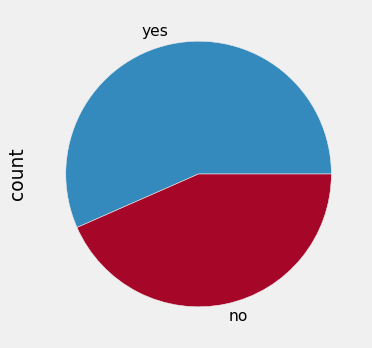

In [ ]:
df['housing'].value_counts().plot.pie(figsize=(5,5))

In [ ]:
# En el gráfico se aprecia que un 55% de clientes cuentan con préstamo hipotecario, frente a un 43% que no.
df['housing'].value_counts(normalize=True)

housing
yes    0.566025
no     0.433975
Name: proportion, dtype: float64

#### 3.1.13. Análisis de variable "loan" (Indicador si existe algún crédito personal)

<Axes: ylabel='count'>

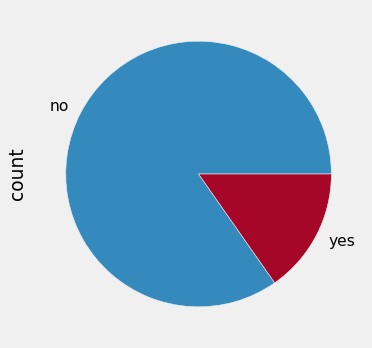

In [ ]:
df['loan'].value_counts().plot.pie(figsize=(5,5))

In [ ]:
# Se observa en el gráfico circular, que un 84% de clientes no cuenta con crédito personal.
# Mientras que un 15% ya cuentan con uno.
df['loan'].value_counts(normalize=True)

loan
no     0.847158
yes    0.152842
Name: proportion, dtype: float64

#### 3.1.14. Análisis de variable "contact" (Tipo de comunicación)

<Axes: ylabel='count'>

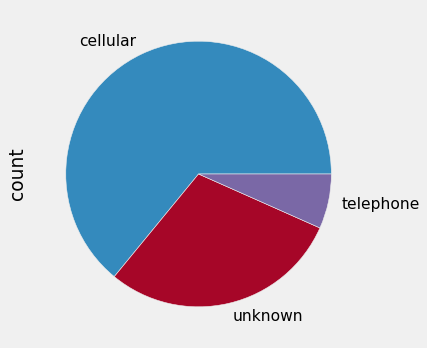

In [ ]:
df['contact'].value_counts().plot.pie(figsize=(5,5))

In [ ]:
# Se observa que la gran mayoría de clientes, un 64% fue contactado por "cellular", sólo un 6% por "telephone".
# Existe un 29% de personas que se desconoce el medio por el cual fueron contactados.
df['contact'].value_counts(normalize=True)

contact
cellular     0.640566
unknown      0.292856
telephone    0.066578
Name: proportion, dtype: float64

#### 3.1.15. Análisis de variable "month" (mes de la última comunicación)

<Axes: xlabel='month'>

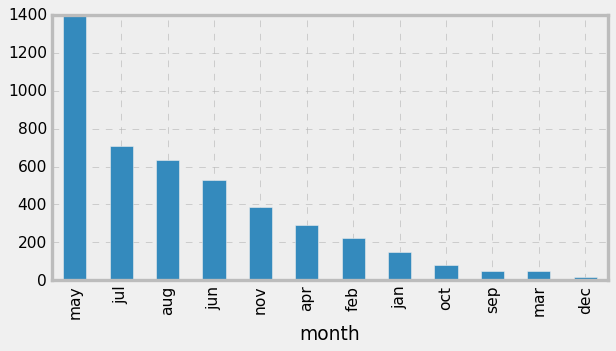

In [ ]:
df['month'].value_counts().plot.bar()

In [ ]:
# En el gráfico de barras se observa que el mes en el que se intensificó la comunicación de la campaña de marketing fue mayo,
# seguido de julio y agosto.
# Mientras que los meses de diciembre, seguido de septiembre y marzo fueron los meses de baja comunicación.

# Se observa que el mes más alto (mayo) representa el 30% de las comunicaciones de la campaña de marketing,
# un valor considerable en relación a los meses de menor comuniación.
# El mes de diciembre representa tan sólo un 0.04%
df['month'].value_counts(normalize=True)

month
may    0.309224
jul    0.156160
aug    0.140013
jun    0.117452
nov    0.086043
apr    0.064809
feb    0.049104
jan    0.032736
oct    0.017695
sep    0.011502
mar    0.010838
dec    0.004424
Name: proportion, dtype: float64

#### 3.1.16. Análisis de variable "poutcome" (resultado de la campaña de marketing anterior)

<Axes: xlabel='poutcome'>

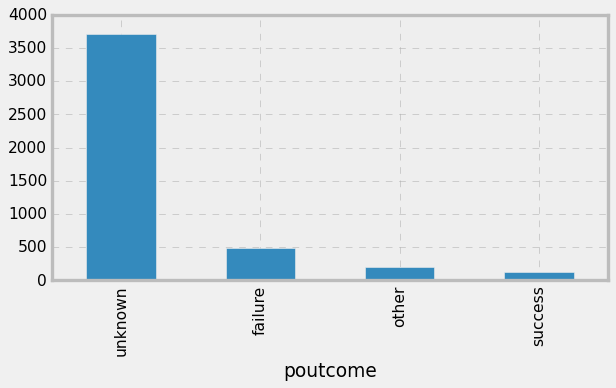

In [ ]:
df['poutcome'].value_counts().plot.bar()

In [ ]:
# Se observa que la gran mayoría de personas contactadas no han participado de una campaña de marketing anterior.
# Se aprecia que las personas que si lograron participar de una campaña anterior, tan solo un 2% tuvo una respuesta afirmativa.
df['poutcome'].value_counts(normalize=True)

poutcome
unknown    0.819509
failure    0.108383
other      0.043574
success    0.028534
Name: proportion, dtype: float64

#### 3.1.17. Análisis de variable "y" (Indicador si el cliente a contratado un depósito a plazo fijo)

<Axes: ylabel='count'>

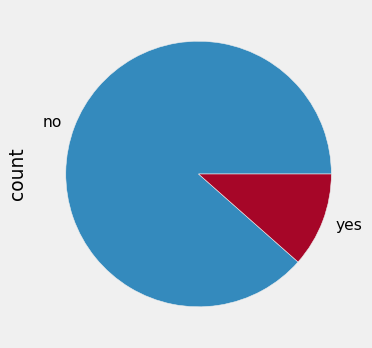

In [ ]:
df['y'].value_counts().plot.pie(figsize=(5,5))

In [ ]:
# Se concluye que la campaña de marketing no ha sido del todo satisfactoria,
# debido a que un 88% no ha aceptado un plazo fijo.
df['y'].value_counts(normalize=True)

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

### 3.2. Análisis de correlación y mapa de calor para las columnas numéricas

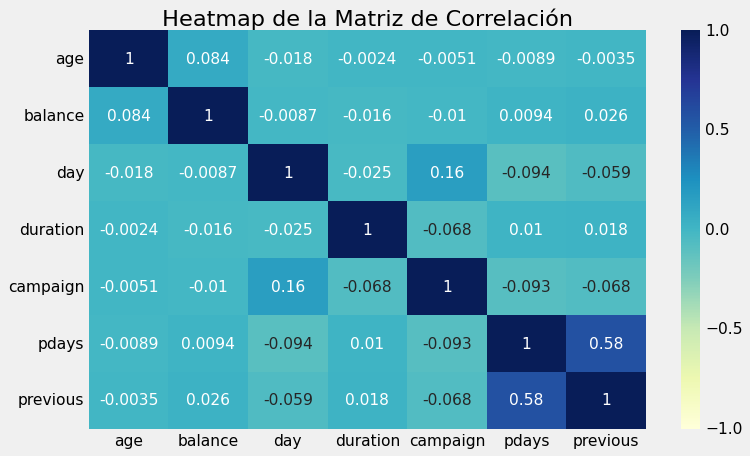

In [ ]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Generar la matriz de correlación.
corr_matrix = df_numeric.corr()

# Crear el heatmap.
plt.figure(figsize=(10, 6))
sb.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

# Del mapa de calor, se puede apreciar que las relaciones entre las distintas variable no se aproximan a 1 o -1.
# Se infiere que todas las variables pueden aportar información relevante al modelo.
# No debiendo de hacer el descarte de ninguna variable.

### 3.3. Análisis de información cruzada

#### 3.3.1. Análisis de Información cruzada para la variable "age"

<Axes: xlabel='Edad'>

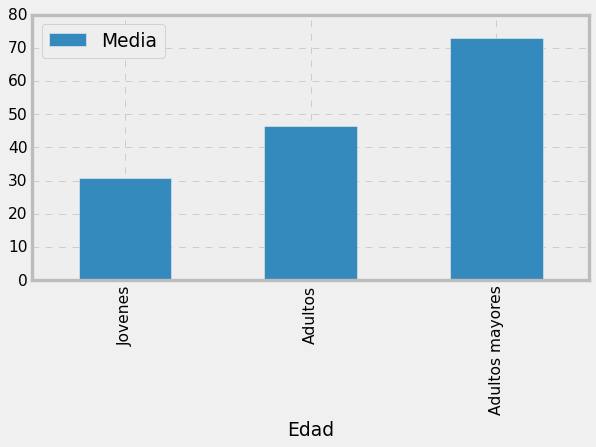

In [ ]:
# Procedemos a agrupar a las personas en tres grupos de edad:
# Jóvenes: Personas menores de 35 años.
# Adultos: Personas entre 35 y 65 años.
# Adultos mayores: Personas mayores de 65 años.
df_ages = df
df_ageolder = df_ages.loc[df_ages['age'] >= 65]
df_age35_65 = df_ages.loc[df_ages['age'] > 35]
df_age35_65 = df_age35_65.loc[df_age35_65['age'] < 65]
df_age35 = df_ages.loc[df_ages['age'] <= 35]

# Analizamos la edad media de cada grupo.
ages_mean = [
    ('Jovenes', df_age35['age'].mean()),
    ('Adultos', df_age35_65['age'].mean()),
    ('Adultos mayores', df_ageolder['age'].mean())
]
df_ages_mean = pd.DataFrame(ages_mean, columns=['Edad', 'Media'])
df_ages_mean.plot.bar(x=0, y=1)

# El histograma muestra que la edad media de cada grupo es:
# Jóvenes: Edad media de 30 años.
# Adultos: Edad media de 46 años.
# Adultos mayores: Edad media de 72 años.

#### 3.3.2. Análisis de Información cruzada para la variable "job"

In [ ]:
# Se aprecia 12 clasificaciones para el tipo de empleo.
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [ ]:
# El mayor tipo de empleo que participa en la campaña d emarketing es 'management'
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

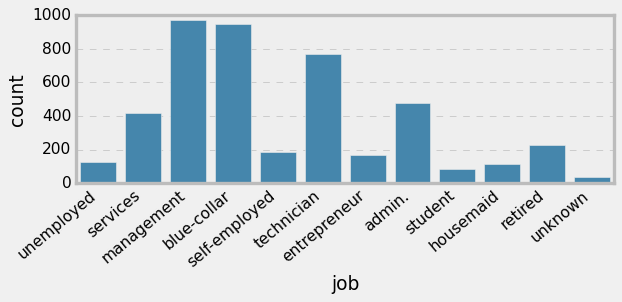

In [ ]:
# Se muestra gráficamente la clasificación y participación de tipo de empleo en la campaña de marketing.
# En relacion con "y" (Indicador si el cliente a contratado un depósito a plazo fijo).
ax = sns.countplot(x="job", data=df[['job', 'y']])
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.show()

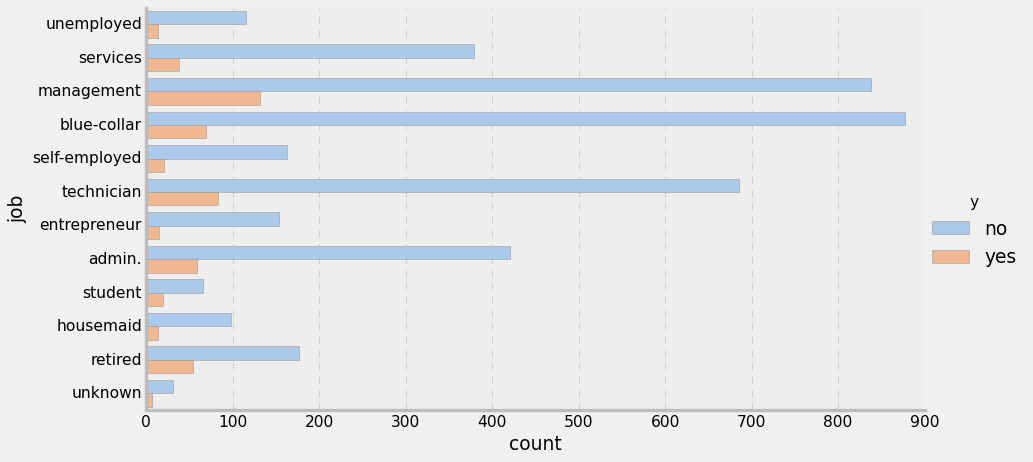

In [ ]:
# Del gráfico podemos deducir:
# - En referencia al grupo 'blue-collar', no ha tenido una respuesta afirmativa a la campaña, presentándose un caso similar con 'management' y 'technician'
# - Se aprecia una buena aceptación de la campaña en 'student' y 'retired'.
sns.catplot(
    data=df[['job', 'y']], y='job', hue='y', kind='count',
    palette='pastel', edgecolor='.6',
    height=6, aspect=2
)

#### 3.3.3. Análisis de Información cruzada para la variable "marital"

<Axes: title={'center': "'marital' vs 'y'"}, xlabel='marital'>

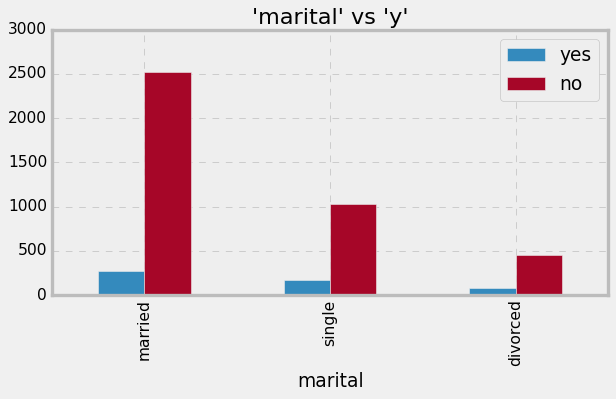

In [ ]:
# En el gráfico se observa que los clientes que mayoritariamente acceden a un depósito a plazo son personas casadas.
# Mientras que las personas divorciados o viudos acceden en menor medida a un depósito a plazo.
# Las personas solteras se encuentran en el porcentaje intermedio de predisposición a adquirir el producto.
df_marital = pd.DataFrame()
df_marital['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
df_marital['no'] = df[df['y'] == 'no']['marital'].value_counts()
df_marital.plot.bar(title = "'marital' vs 'y'")

#### 3.3.4. Análisis de Información cruzada para la variable "education"

In [ ]:
# Análisis de información cruzada para las variables de "education" y "default" (Indicador si existe algún crédito en rojo)
e_df = pd.DataFrame()
e_df['yes_default'] = df[df['default'] == 'yes']['education'].value_counts()
e_df['no_default'] = df[df['default'] == 'no']['education'].value_counts()
e_df

,yes_default,no_default
education,,
secondary,46,2260
tertiary,17,1333
primary,10,668
unknown,3,184


<Axes: title={'center': 'Education vs Default'}, xlabel='education'>

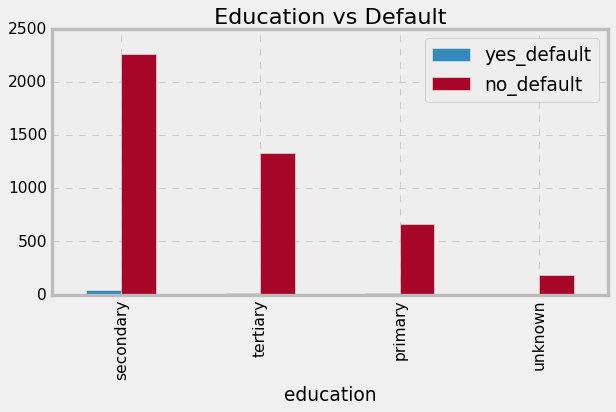

In [ ]:
# En el gráfico se puede apreciar que la mayoría de clientes tiene educación secundaria.
# A su vez, la mayor parte de ellos no tiene un crédito en rojo.
e_df.plot.bar(title = 'Education vs Default')

<Axes: xlabel='education'>

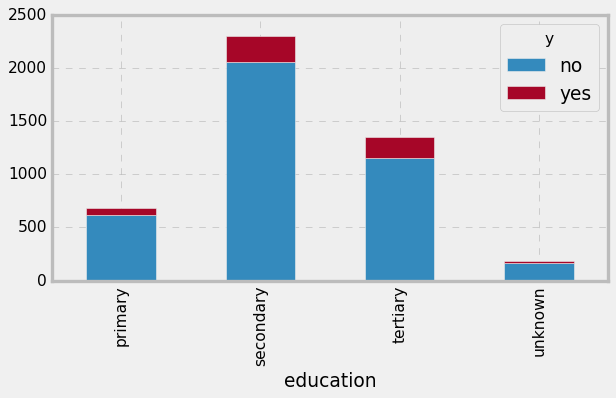

In [ ]:
# Gráfico de barras para análisis de información cruzada entre "education" y "y"
# (Indicador si el cliente ha aceptado un depósito a plazo fijo).
# Se aprecia que los clientes con educación terciaria son los poseen una mayor proporción
# que aceptaron un depósito a plazo fijo en relación a otras categorías.
types = df.groupby("education")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

#### 3.3.5. Análisis de Información cruzada para la variable "balance" (Balance de la cuenta cliente)

<Axes: xlabel='age', ylabel='balance'>

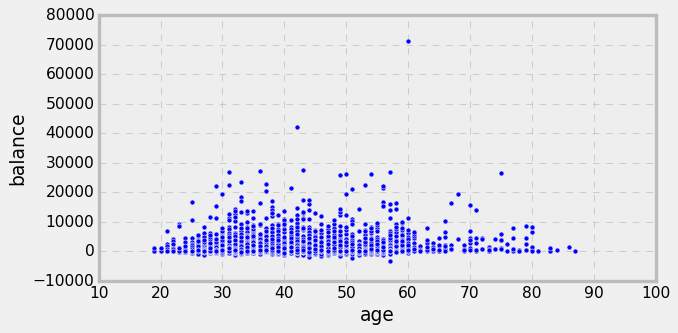

In [ ]:
# Análisis de información cruzada entre "edad" y "balance"
# Se aprecia el balance de la cuenta cliente en relación al rango de edad, siendo entre 40 y 50 años
# donde se aprecia un mejor balance.
df.plot(kind='scatter', x='age', y='balance')

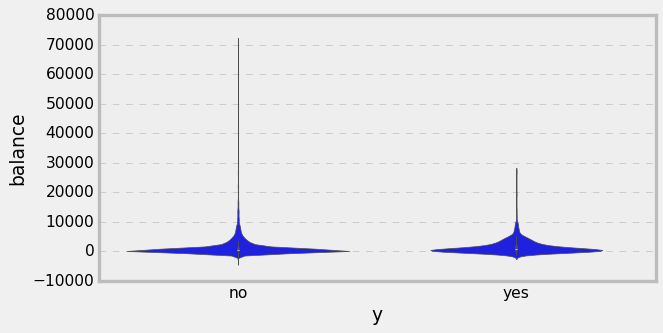

In [ ]:
# Análisis de información cruzada para la variable "y" (Indicador de aceptación de plazo fijo) y "balance"
# Se aprecia que las personas que cuentan con un mejor balance no aceptan un depósito a plazo fijo.
sns.violinplot(x="y", y="balance", data=df)
plt.show()

#### 3.3.6. Análisis de Información cruzada para la variable "housing" (Indicador de préstamo hipotecario)

<Axes: ylabel='Adultos mayores'>

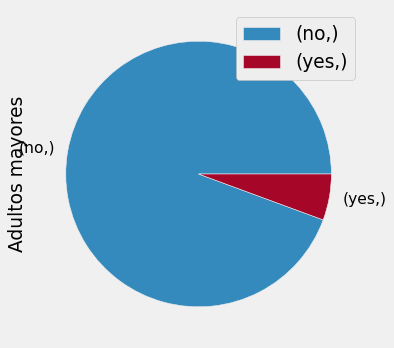

In [ ]:
# Análisis de información cruzada entre adultos mayores y "housing"
# Se observa que la gran proporción de adultos mayores no cuentan con un préstamo hipotecario
df_ageolder[['housing']].value_counts().plot.pie(
    figsize=(5,5), legend=True, ylabel='Adultos mayores')

<Axes: ylabel='Personas Adultas'>

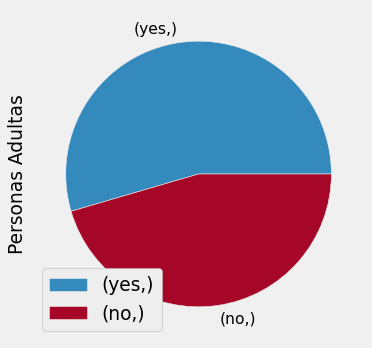

In [ ]:
# Análisis de información cruzada entre personas adultas y "housing"
# Se aprecia la proporción de préstamos hipotecarios para adultos de entre 35 y 65 años.
df_age35_65[['housing']].value_counts().plot.pie(
    ylabel='Personas Adultas', figsize=(5,5), legend= True)

<Axes: ylabel='Personas Jóvenes'>

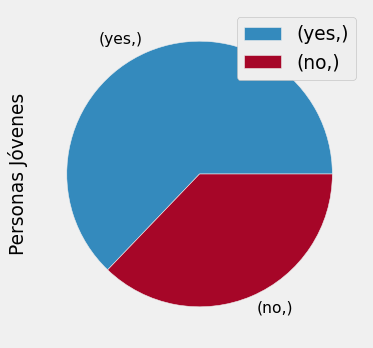

In [ ]:
# Análisis de información cruzada entre personas jóvenes y "housing"
# Se determina, que las personas jóvenes son las que cuentan con mas préstamos hipotecarios en relación a otros grupos etarios.
df_age35[['housing']].value_counts(normalize=True).plot.pie(
    figsize=(5,5), legend=True, ylabel='Personas Jóvenes')

#### 3.3.7. Análisis de Información cruzada para la variable "loan"

<Axes: title={'center': "'loan' vs 'y'"}, xlabel='loan'>

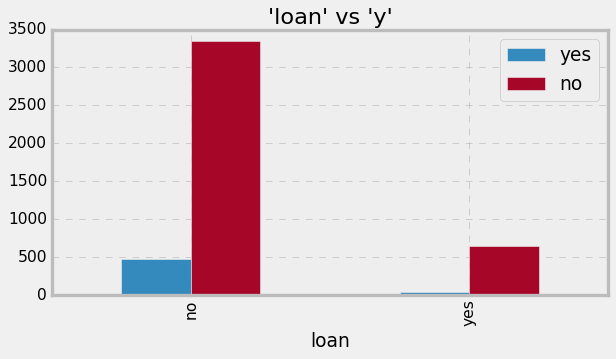

In [ ]:
# Análisis de información cruzada entre "loan" (Indicador si existe un crédito personal) y "y" (Indicador de aceptación de plazo fijo).
# En el gráfico de barras se aprecia que aquellos clientes que no cuentan con un crédito personal son mas propensos a aceptar un
# depósito de plazo fijo.
df_loan = pd.DataFrame()
df_loan['yes'] = df[df['y'] == 'yes']['loan'].value_counts()
df_loan['no'] = df[df['y'] == 'no']['loan'].value_counts()
df_loan.plot.bar(title = "'loan' vs 'y'")

#### 3.3.8. Análisis de Información cruzada para la variable "contact"

<Axes: title={'center': "'contact' vs 'y'"}, xlabel='contact'>

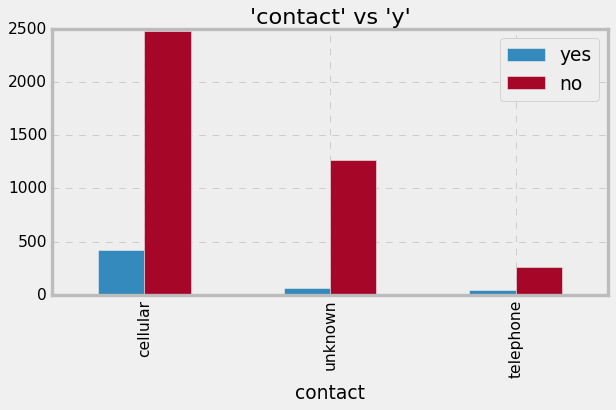

In [ ]:
# Análisis de información cruzada para la variable "contact" (tipo de contacto) y "y" (Indicador de aceptación de plazo fijo).
# Se deduce del gráfico que el medio de comunicación mas eficaz para la aceptación de un depósito a plazo fijo es el celular.
df_contact = pd.DataFrame()
df_contact['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
df_contact['no'] = df[df['y'] == 'no']['contact'].value_counts()
df_contact.plot.bar(title="'contact' vs 'y'")

#### 3.3.9. Análisis de Información cruzada para la variable "duration" (duración en segundos de la última comunicación)

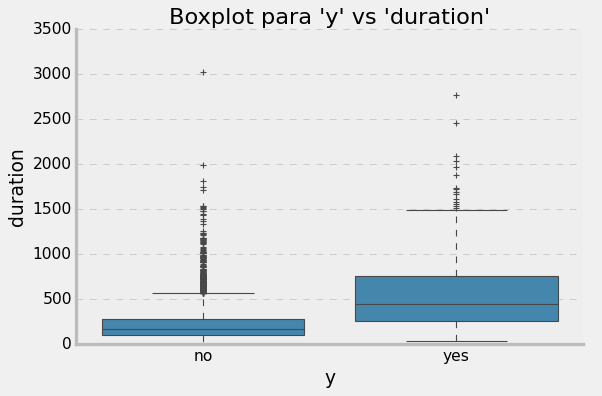

In [ ]:
# Análisis de información cruzada entre "duration" (duración en segundos de la última llamada) y "y" (Indicador de aceptación de depósito a plazo fijo)
# Se pdeduce que las comunicaciones que produjeron un resultado negativo (negación del depósito a plazo fijo) fueron de corta duración.
sns.catplot(x='y', y='duration', data=df, kind='box', aspect=1.5)
plt.title("Boxplot para 'y' vs 'duration'")
plt.show()

#### 3.3.10. Análisis de Información cruzada para la variable "pdays"
pdays: Número de días desde que se contactó con el cliente desde una campaña anterior. El valor -1 significa que el cliente no fue contactado previamente (numérico)

In [ ]:
# Númeroe de clientes que no fueron contactados para la campaña: 3555.
df[df['pdays'] == -1]['pdays'].count()

np.int64(3705)

In [ ]:
# Reemplazo del valor -1 por 0. Creación de variable "flg_contacted",
# donde el valor de 1 representa si el cliente fue contactado; y 0, no contactados.
# No contactados: 3555
# Contactados: 779
df['flg_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)
df[['flg_contacted']].value_counts()

flg_contacted
0                3705
1                 816
Name: count, dtype: int64

<Axes: title={'center': 'Usuarios contactados'}, ylabel='Porcentaje'>

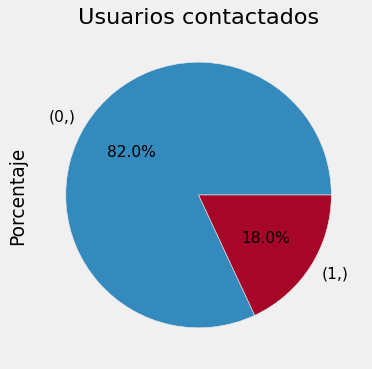

In [ ]:
# Gráfico circular que representa el porcentaje de los usuarios contactados y no contactados.
df[['flg_contacted']].value_counts(normalize=True).plot.pie(
    ylabel="Porcentaje", title="Usuarios contactados", figsize=(5,5), autopct='%1.1f%%')

In [ ]:
print('Cantidad de Clientes que no han sido contactados en la última campaña: ', len(df[df.pdays == -1]))
print('Número máximo de dias del último contacto con un cliente: ', df['pdays'].max())
print(f'Porcentaje de clientes que no fueron contactados en la última campaña: {df[df["pdays"] == -1].shape[0] / df.shape[0] * 100:.2f}%')
print(f'Pocentaje de clientes contactados el mismo dia: {df[df["pdays"] == 0].shape[0] / df.shape[0] * 100:.2f}%')
print(f'Porcentaje de clientes contactados después de un dia: {df[df["pdays"] == 1].shape[0] / df.shape[0] * 100:.2f}%')

Cantidad de Clientes que no han sido contactados en la última campaña:  3705
Número máximo de dias del último contacto con un cliente:  871
Porcentaje de clientes que no fueron contactados en la última campaña: 81.95%
Pocentaje de clientes contactados el mismo dia: 0.00%
Porcentaje de clientes contactados después de un dia: 0.04%


### 4. Feature Engineering

#### 4.1. Transformación de las variables "default", "housing", "loan" y "y" a valores numéricos

In [ ]:
# yes=1; no=0
df['default'] = df_backup['default'].map(
    {'yes': 1, 'no': 0}
)
df['housing'] = df_backup['housing'].map(
    {'yes': 1, 'no': 0}
)
df['loan'] = df_backup['loan'].map(
    {'yes': 1, 'no': 0}
)
df['y'] = df_backup['y'].map(
    {'yes': 1, 'no': 0}
)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,flg_contacted
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0,1


#### 4.2. Eliminar los valores "unknown" de la variable "education"

In [ ]:
# Se eliminan los valores "unknown" debido a que no representan un valor válido en la categoría.
# De un total de 4521 registros, se ha reducido a 4334 registros.
df = df[df['education'] != 'unknown']
df = df.reset_index(drop=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,flg_contacted
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,1
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0,0
4330,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0,0
4331,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0,0
4332,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0,1
